# Which one is a better plan?

Telecom operator Megaline offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
We should to do preliminary analysis of the plans based on a relatively small client selection. We have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. 
We should to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

In [1]:
import pandas as pd
from scipy import stats as st
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

warnings.filterwarnings(action='ignore')

## Load data

In [2]:
df_internet=pd.read_csv('/datasets/megaline_internet.csv')
df_messages=pd.read_csv('/datasets/megaline_messages.csv')
df_calls=pd.read_csv('/datasets/megaline_calls.csv')
df_plans=pd.read_csv('/datasets/megaline_plans.csv')
df_users=pd.read_csv('/datasets/megaline_users.csv')



## Prepare the data

Let's check all our data for nulls, duplicates and fix data types where necessary.

In [3]:
print(df_internet.info())
df_internet.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [4]:
df_internet['session_date']=pd.to_datetime(df_internet['session_date'],format='%Y-%m-%d')
df_internet['month']=df_internet['session_date'].dt.month

In [5]:
def df_replace(row):
    row['id']=row['id'].replace('_','.')
    return row['id']
df_internet['id']=df_internet.apply(df_replace,axis=1)


In [6]:
print(df_internet.info())
df_internet.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB
None


,id,user_id,session_date,mb_used,month
0,1000.13,1000,2018-12-29,89.86,12
1,1000.204,1000,2018-12-31,0.00,12
2,1000.379,1000,2018-12-28,660.40,12
3,1000.413,1000,2018-12-26,270.99,12
4,1000.442,1000,2018-12-27,880.22,12
5,1001.0,1001,2018-08-24,284.68,8
6,1001.3,1001,2018-12-09,656.04,12
7,1001.4,1001,2018-11-04,16.97,11
8,1001.10,1001,2018-11-27,135.18,11
9,1001.15,1001,2018-12-13,761.92,12


In [7]:
print(df_internet.duplicated().sum())
df_internet.isna().sum()

0


id              0
user_id         0
session_date    0
mb_used         0
month           0
dtype: int64

In [8]:
print(df_messages.info())
df_messages.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [9]:
print(df_messages.duplicated().sum())
df_messages.isna().sum()

0


id              0
user_id         0
message_date    0
dtype: int64

In [10]:
print(df_calls.info())
df_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [11]:
print(df_calls.duplicated().sum())
df_calls.isna().sum()

0


id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [12]:
print(df_users.info())
df_users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [13]:
print(df_users.duplicated().sum())
df_users.isna().sum()

0


user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

## Plans

In [14]:
print(df_plans.info())
df_plans.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [15]:
df_plans.duplicated().sum()

0

In [16]:
df_plans=df_plans.rename(columns={'plan_name':'plan'})


In [17]:
df_plans# Print a sample of data for plans



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


We checked all our data for nulls, duplicates.

## Fix data

We fix the data type for the date in messages and calls.
We fill in zero values in data about churn_date users. '2018-12-31 (since the user is still using the services, we will add the end date of observations)

In [18]:
df_messages['message_date']=pd.to_datetime(df_messages['message_date'],format='%Y-%m-%d')
df_messages['month']=df_messages['message_date'].dt.month

In [19]:
df_messages['id']=df_messages.apply(df_replace,axis=1)

In [20]:
print(df_messages.info())
df_messages.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB
None


,id,user_id,message_date,month
0,1000.125,1000,2018-12-27,12
1,1000.160,1000,2018-12-31,12
2,1000.223,1000,2018-12-31,12
3,1000.251,1000,2018-12-27,12
4,1000.255,1000,2018-12-26,12
5,1000.346,1000,2018-12-29,12
6,1000.386,1000,2018-12-30,12
7,1000.413,1000,2018-12-31,12
8,1000.502,1000,2018-12-27,12
9,1000.525,1000,2018-12-28,12


In [21]:
df_calls['call_date']=pd.to_datetime(df_calls['call_date'],format='%Y-%m-%d')
df_calls['month']=df_calls['call_date'].dt.month

In [22]:
print(df_calls.info())
df_calls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.3+ MB
None


,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11
137731,1499_200,1499,2018-10-20,10.89,10
137732,1499_201,1499,2018-09-21,8.12,9
137733,1499_202,1499,2018-10-10,0.37,10


In [23]:
df_users['churn_date']=df_users['churn_date'].fillna('2018-12-31')

In [24]:
df_users.isna().sum()

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64

In [25]:
df_users['reg_date']=pd.to_datetime(df_users['reg_date'],format='%Y-%m-%d')
df_users['churn_date']=pd.to_datetime(df_users['churn_date'],format='%Y-%m-%d')
df_users['month_reg']=df_users['reg_date'].dt.month
df_users['month_churn']=df_users['churn_date'].dt.month


In [26]:
print(df_users.info())
df_users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      500 non-null    int64         
 1   first_name   500 non-null    object        
 2   last_name    500 non-null    object        
 3   age          500 non-null    int64         
 4   city         500 non-null    object        
 5   reg_date     500 non-null    datetime64[ns]
 6   plan         500 non-null    object        
 7   churn_date   500 non-null    datetime64[ns]
 8   month_reg    500 non-null    int64         
 9   month_churn  500 non-null    int64         
dtypes: datetime64[ns](2), int64(4), object(4)
memory usage: 39.2+ KB
None


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month_reg,month_churn
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,12,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,8,12
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,10,12
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,1,12
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,5,12
...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2018-12-31,9,12
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2018-12-31,2,12
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2018-12-31,12,12
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-12-31,2,12


## Enrich data

Let's add data about the age groups of users, maybe they will be useful to us later.

In [27]:
def assign_age_group(age):
    if age < 30:
        return '18-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    elif age >= 60:
        return '60+'
df_users['group_age']=df_users['age'].apply(assign_age_group)


In [28]:
def func_term(row):
    if row['month_reg']==12:
        row['month_term']=1
    else:row['month_term']=row['month_churn']-row['month_reg']
    return row['month_term']
df_users['month_term']=df_users.apply(func_term,axis=1)
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month_reg,month_churn,group_age,month_term
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,12,12,40-49,1
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,8,12,18-29,4
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,10,12,30-39,2
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,1,12,50-59,11
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,5,12,40-49,7
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2018-12-31,9,12,60+,3
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2018-12-31,2,12,40-49,10
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2018-12-31,12,12,40-49,1
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-12-31,2,12,50-59,10


## Users

In [29]:
df_users.describe()


,user_id,age,month_reg,month_churn,month_term
count,500.000000,500.000000,500.000000,500.00000,500.000000
mean,1249.500000,45.486000,6.290000,11.91600,5.700000
std,144.481833,16.972269,3.438247,0.47896,3.281392
min,1000.000000,18.000000,1.000000,7.00000,1.000000
25%,1124.750000,30.000000,3.000000,12.00000,3.000000
50%,1249.500000,46.000000,6.000000,12.00000,6.000000
75%,1374.250000,61.000000,9.000000,12.00000,8.000000
max,1499.000000,75.000000,12.000000,12.00000,11.000000


count    500.000000
mean      45.486000
std       16.972269
min       18.000000
25%       30.000000
50%       46.000000
75%       61.000000
max       75.000000
Name: age, dtype: float64
line of outliers:  107.5
count    500.000000
mean       5.700000
std        3.281392
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       11.000000
Name: month_term, dtype: float64
line of outliers:  15.5


(None,
 <AxesSubplot:>,
 (0.0, 18.0),
 None)

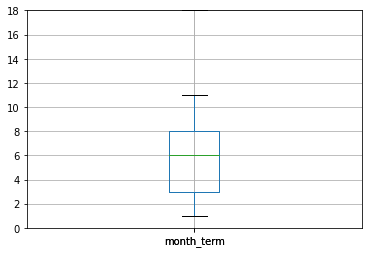

In [30]:
def func(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return (print(data[column].describe()), data.boxplot(column),plt.hlines(y=[Q1-1.5*IQR], xmin=0.5, xmax=1),plt.ylim(0,Q3+IQR*2),
            print('line of outliers: ',IQR*1.5+Q3))          
func(df_users,'age')
func(df_users,'month_term')

The data is quite complete and there are no outliers.

### Fix Data

In [31]:
df_users['region']=df_users['city'].str.split(',',expand=True)[1]

In [32]:
df_users['region']=df_users['region'].apply(lambda row: row.replace('-',' '))

In [33]:
df_users['region'].unique()

array([' GA MSA', ' WA MSA', ' NV MSA', ' OK MSA', ' TX MSA', ' CA MSA',
       ' MI MSA', ' FL MSA', ' OH MSA', ' IL IN WI MSA', ' TN MSA',
       ' NY NJ PA MSA', ' PA MSA', ' DC VA MD WV MSA', ' IN MSA',
       ' NE IA MSA', ' PA NJ DE MD MSA', ' AL MSA', ' NC SC MSA',
       ' CO MSA', ' NM MSA', ' MA NH MSA', ' AZ MSA', ' OR WA MSA',
       ' OH KY IN MSA', ' SC MSA', ' NY MSA', ' TN MS AR MSA',
       ' KY IN MSA', ' RI MA MSA', ' UT MSA', ' HI MSA', ' CT MSA',
       ' LA MSA', ' VA NC MSA', ' MD MSA', ' WI MSA', ' VA MSA',
       ' MO IL MSA', ' MN WI MSA', ' MO KS MSA', ' NC MSA'], dtype=object)

In [34]:
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month_reg,month_churn,group_age,month_term,region
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,12,12,40-49,1,GA MSA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,8,12,18-29,4,WA MSA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,10,12,30-39,2,NV MSA
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,1,12,50-59,11,OK MSA
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,5,12,40-49,7,WA MSA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2018-12-31,9,12,60+,3,NY NJ PA MSA
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2018-12-31,2,12,40-49,10,LA MSA
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2018-12-31,12,12,40-49,1,CA MSA
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-12-31,2,12,50-59,10,NY NJ PA MSA


In [35]:
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month_reg,month_churn,group_age,month_term,region
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,12,12,40-49,1,GA MSA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,8,12,18-29,4,WA MSA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,10,12,30-39,2,NV MSA
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,1,12,50-59,11,OK MSA
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,5,12,40-49,7,WA MSA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2018-12-31,9,12,60+,3,NY NJ PA MSA
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2018-12-31,2,12,40-49,10,LA MSA
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2018-12-31,12,12,40-49,1,CA MSA
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-12-31,2,12,50-59,10,NY NJ PA MSA


### Enrich Data

In [36]:
df_users_total= pd.merge(left = df_users, 
                right = df_plans, how='outer',on=['plan']).fillna(0)
df_users_total=df_users_total.drop(columns=['first_name','last_name','age','reg_date','churn_date','month_reg','month_churn'])
df_users_total

,user_id,city,plan,group_age,month_term,region,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,40-49,1,GA MSA,1000,30720,3000,70,7,0.01,0.01
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,60+,1,CA MSA,1000,30720,3000,70,7,0.01,0.01
2,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,50-59,4,FL MSA,1000,30720,3000,70,7,0.01,0.01
3,1011,"Cleveland-Elyria, OH MSA",ultimate,60+,11,OH MSA,1000,30720,3000,70,7,0.01,0.01
4,1013,"Knoxville, TN MSA",ultimate,50-59,1,TN MSA,1000,30720,3000,70,7,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1494,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,60+,8,NY NJ PA MSA,50,15360,500,20,10,0.03,0.03
496,1495,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,60+,3,NY NJ PA MSA,50,15360,500,20,10,0.03,0.03
497,1496,"New Orleans-Metairie, LA MSA",surf,40-49,10,LA MSA,50,15360,500,20,10,0.03,0.03
498,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50-59,10,NY NJ PA MSA,50,15360,500,20,10,0.03,0.03


## Calls

In [37]:
# Print the general/summary information about the calls' DataFrame
df_calls

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11
137731,1499_200,1499,2018-10-20,10.89,10
137732,1499_201,1499,2018-09-21,8.12,9
137733,1499_202,1499,2018-10-10,0.37,10


count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64
line of outliers:  24.79


(None,
 <AxesSubplot:>,
 (0.0, 29.489999999999995),
 None)

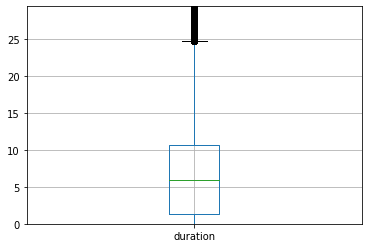

In [38]:
df_calls.describe()# Print a sample of data for calls    
func(df_calls,'duration')


In [39]:
df_calls.query('duration==0').shape[0]

26834

In [40]:
df_calls.query('duration==0').shape[0]/df_calls.shape[0]

0.1948233927469416

There are calls with zero duration, but we cannot delete this data, since there are about 20% of them. Perhaps this is: rejected calls, or unavailable subscribers, so we will also take them into account in the analysis.

### Fix data

All durations are rounded up, according to the rules of our tariffs.

In [41]:
df_calls['duration']=df_calls['duration'].apply(lambda row:math.ceil(row))

In [42]:
df_calls

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9,11
137731,1499_200,1499,2018-10-20,11,10
137732,1499_201,1499,2018-09-21,9,9
137733,1499_202,1499,2018-10-10,1,10


### Enrich data

Let's find values for the number of calls and their duration by months

In [43]:
df_calls

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9,11
137731,1499_200,1499,2018-10-20,11,10
137732,1499_201,1499,2018-09-21,9,9
137733,1499_202,1499,2018-10-10,1,10


In [44]:
df_calls=df_calls.pivot_table(index=['user_id','month'],values=['duration'],aggfunc=['sum','count'])

In [45]:
df_calls

sum    count
              duration duration
user_id month                  
1000    12         124       16
1001    8          182       27
        9          315       49
        10         393       65
        11         426       64
...                ...      ...
1498    12         339       39
1499    9          346       41
        10         385       53
        11         308       45
        12         496       65

[2258 rows x 2 columns]

In [46]:
df_calls.reset_index(inplace= True )

In [47]:
df_calls.columns=['user_id','month','amount_calls','number_calls']

In [48]:
df_calls

,user_id,month,amount_calls,number_calls
0,1000,12,124,16
1,1001,8,182,27
2,1001,9,315,49
3,1001,10,393,65
4,1001,11,426,64
...,...,...,...,...
2253,1498,12,339,39
2254,1499,9,346,41
2255,1499,10,385,53
2256,1499,11,308,45


## Messages

In [49]:
df_messages.describe()# Print the general/summary information about the messages' DataFrame

,user_id,month
count,76051.000000,76051.000000
mean,1245.972768,9.584016
std,139.843635,2.276392
min,1000.000000,1.000000
25%,1123.000000,8.000000
50%,1251.000000,10.000000
75%,1362.000000,12.000000
max,1497.000000,12.000000


In [50]:
df_messages

,id,user_id,message_date,month
0,1000.125,1000,2018-12-27,12
1,1000.160,1000,2018-12-31,12
2,1000.223,1000,2018-12-31,12
3,1000.251,1000,2018-12-27,12
4,1000.255,1000,2018-12-26,12
...,...,...,...,...
76046,1497.526,1497,2018-12-24,12
76047,1497.536,1497,2018-12-24,12
76048,1497.547,1497,2018-12-31,12
76049,1497.558,1497,2018-12-24,12


The data is quite complete.

### Enrich data

Find the average values for the number of messages by month.

In [51]:
df_messages=df_messages.pivot_table(index=['user_id','month'],values=['id'],aggfunc='count')

In [52]:
df_messages

id
user_id month    
1000    12     11
1001    8      30
        9      44
        10     53
        11     36
...            ..
1496    9      21
        10     18
        11     13
        12     11
1497    12     50

[1806 rows x 1 columns]

In [53]:
df_messages.reset_index(inplace= True )

In [54]:
df_messages

,user_id,month,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [55]:
df_messages.columns=['user_id','month','number_messages']

## Internet

In [56]:
df_internet.describe()# Print the general/summary information about the internet DataFram


,user_id,mb_used,month
count,104825.000000,104825.000000,104825.000000
mean,1242.496361,366.713701,9.342552
std,142.053913,277.170542,2.400404
min,1000.000000,0.000000,1.000000
25%,1122.000000,136.080000,8.000000
50%,1236.000000,343.980000,10.000000
75%,1367.000000,554.610000,11.000000
max,1499.000000,1693.470000,12.000000


count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64
line of outliers:  1182.405


(None,
 <AxesSubplot:>,
 (0.0, 1391.67),
 None)

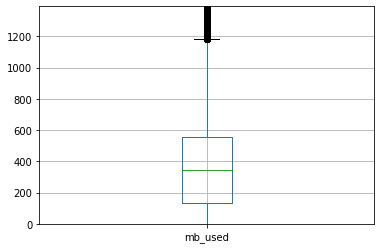

In [57]:
func(df_internet,'mb_used')# Print a sample of data for the internet traffic

In [58]:
df_internet.query('mb_used==0').shape[0]/df_internet.shape[0]

0.1311423801574052

There are users with zero traffic volume, but we cannot delete this data, since it is about 13% and it is necessary to take into account in the analysis that some users simply do not use the Internet.

### Fix data

### Enrich data

Let's find the average values by traffic volume by months.

In [59]:
df_internet=df_internet.pivot_table(index=['user_id','month'],values=['mb_used'],aggfunc=['sum'])
df_internet

sum
                mb_used
user_id month          
1000    12      1901.47
1001    8       6919.15
        9      13314.82
        10     22330.49
        11     18504.30
...                 ...
1498    12     23137.69
1499    9      12984.76
        10     19492.43
        11     16813.83
        12     22059.21

[2277 rows x 1 columns]

In [60]:
df_internet.reset_index(inplace= True )

In [61]:
df_internet.columns=['user_id','month','mb_used']

In [62]:
df_internet

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


## Study plan conditions

It is critical to understand how the plans work, how users are charged based on their plan subscription. So printing out the plan information to view their conditions once again.

In [63]:
df_plans# Print out the plan conditions and make sure they are clear for you



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

Now let's combine the aggregated data for each user into one table.

In [64]:
df_calls

,user_id,month,amount_calls,number_calls
0,1000,12,124,16
1,1001,8,182,27
2,1001,9,315,49
3,1001,10,393,65
4,1001,11,426,64
...,...,...,...,...
2253,1498,12,339,39
2254,1499,9,346,41
2255,1499,10,385,53
2256,1499,11,308,45


In [65]:
# Calculate the number of calls made by each user per month. Save the result.
# Calculate the amount of minutes spent by each user per month. Save the result.
df_calls_per_month=df_calls.pivot_table(index=['user_id','month'],values=['amount_calls','number_calls'])
df_calls_per_month['amount_calls']=round(df_calls_per_month['amount_calls'])


In [66]:
df_calls_per_month

amount_calls  number_calls
user_id month                            
1000    12              124            16
1001    8               182            27
        9               315            49
        10              393            65
        11              426            64
...                     ...           ...
1498    12              339            39
1499    9               346            41
        10              385            53
        11              308            45
        12              496            65

[2258 rows x 2 columns]

In [67]:
# Calculate the number of messages sent by each user per month. Save the result.
df_messages_per_month=df_messages.pivot_table(index=['user_id','month'],values='number_messages')
df_messages_per_month

number_messages
user_id month                 
1000    12                  11
1001    8                   30
        9                   44
        10                  53
        11                  36
...                        ...
1496    9                   21
        10                  18
        11                  13
        12                  11
1497    12                  50

[1806 rows x 1 columns]

In [68]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
df_internet_per_month=df_internet.pivot_table(index=['user_id','month'],values='mb_used')
df_internet_per_month

mb_used
user_id month          
1000    12      1901.47
1001    8       6919.15
        9      13314.82
        10     22330.49
        11     18504.30
...                 ...
1498    12     23137.69
1499    9      12984.76
        10     19492.43
        11     16813.83
        12     22059.21

[2277 rows x 1 columns]

[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [69]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
total= pd.merge(left = df_calls_per_month , 
                right = df_messages_per_month, how='outer',on=['user_id','month']).fillna(0)

In [70]:
total

amount_calls  number_calls  number_messages
user_id month                                             
1000    12            124.0          16.0             11.0
1001    8             182.0          27.0             30.0
        9             315.0          49.0             44.0
        10            393.0          65.0             53.0
        11            426.0          64.0             36.0
...                     ...           ...              ...
1349    10              0.0           0.0             76.0
        11              0.0           0.0             72.0
        12              0.0           0.0             61.0
1361    5               0.0           0.0              2.0
1482    10              0.0           0.0              2.0

[2291 rows x 3 columns]

In [71]:
total1=pd.merge(left = total , 
                right = df_internet_per_month, how='outer',on=['user_id','month']).fillna(0)
total1.sort_index()

amount_calls  number_calls  number_messages   mb_used
user_id month                                                       
1000    12            124.0          16.0             11.0   1901.47
1001    8             182.0          27.0             30.0   6919.15
        9             315.0          49.0             44.0  13314.82
        10            393.0          65.0             53.0  22330.49
        11            426.0          64.0             36.0  18504.30
...                     ...           ...              ...       ...
1498    12            339.0          39.0              0.0  23137.69
1499    9             346.0          41.0              0.0  12984.76
        10            385.0          53.0              0.0  19492.43
        11            308.0          45.0              0.0  16813.83
        12            496.0          65.0              0.0  22059.21

[2293 rows x 4 columns]

In [72]:
total1.reset_index(inplace= True , level = ['month'])

In [73]:
total1

,month,amount_calls,number_calls,number_messages,mb_used
user_id,,,,,
1000,12,124.0,16.0,11.0,1901.47
1001,8,182.0,27.0,30.0,6919.15
1001,9,315.0,49.0,44.0,13314.82
1001,10,393.0,65.0,53.0,22330.49
1001,11,426.0,64.0,36.0,18504.30
...,...,...,...,...,...
1349,12,0.0,0.0,61.0,13039.91
1361,5,0.0,0.0,2.0,1519.69
1482,10,0.0,0.0,2.0,0.00


In [74]:
total2=pd.merge(left = total1 , 
                right = df_users_total, how='left',on=['user_id']).fillna(0)# Add the plan information



In [75]:
total2['number_messages']=round(total2['number_messages'])
total2['month']=total2['month'].astype(int)
total2

,user_id,month,amount_calls,number_calls,number_messages,mb_used,city,plan,group_age,month_term,region,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,124.0,16.0,11.0,1901.47,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,40-49,1,GA MSA,1000,30720,3000,70,7,0.01,0.01
1,1001,8,182.0,27.0,30.0,6919.15,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,50,15360,500,20,10,0.03,0.03
2,1001,9,315.0,49.0,44.0,13314.82,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,50,15360,500,20,10,0.03,0.03
3,1001,10,393.0,65.0,53.0,22330.49,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,50,15360,500,20,10,0.03,0.03
4,1001,11,426.0,64.0,36.0,18504.30,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,"Boston-Cambridge-Newton, MA-NH MSA",surf,60+,2,MA NH MSA,50,15360,500,20,10,0.03,0.03
2289,1361,5,0.0,0.0,2.0,1519.69,"Birmingham-Hoover, AL MSA",surf,40-49,8,AL MSA,50,15360,500,20,10,0.03,0.03
2290,1482,10,0.0,0.0,2.0,0.00,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,60+,11,NY NJ PA MSA,1000,30720,3000,70,7,0.01,0.01
2291,1108,12,0.0,0.0,0.0,233.17,"Salt Lake City, UT MSA",ultimate,40-49,1,UT MSA,1000,30720,3000,70,7,0.01,0.01


In [76]:
total2

,user_id,month,amount_calls,number_calls,number_messages,mb_used,city,plan,group_age,month_term,region,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,124.0,16.0,11.0,1901.47,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,40-49,1,GA MSA,1000,30720,3000,70,7,0.01,0.01
1,1001,8,182.0,27.0,30.0,6919.15,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,50,15360,500,20,10,0.03,0.03
2,1001,9,315.0,49.0,44.0,13314.82,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,50,15360,500,20,10,0.03,0.03
3,1001,10,393.0,65.0,53.0,22330.49,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,50,15360,500,20,10,0.03,0.03
4,1001,11,426.0,64.0,36.0,18504.30,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,"Boston-Cambridge-Newton, MA-NH MSA",surf,60+,2,MA NH MSA,50,15360,500,20,10,0.03,0.03
2289,1361,5,0.0,0.0,2.0,1519.69,"Birmingham-Hoover, AL MSA",surf,40-49,8,AL MSA,50,15360,500,20,10,0.03,0.03
2290,1482,10,0.0,0.0,2.0,0.00,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,60+,11,NY NJ PA MSA,1000,30720,3000,70,7,0.01,0.01
2291,1108,12,0.0,0.0,0.0,233.17,"Salt Lake City, UT MSA",ultimate,40-49,1,UT MSA,1000,30720,3000,70,7,0.01,0.01


In [77]:
# Calculate the monthly revenue for each user
def monthly_revenue(row):
    if (row['amount_calls']-row['minutes_included'])>0:
        row['monthly_revenue_calls']=(row['amount_calls']-row['minutes_included'])*row['usd_per_minute']
    else:row['monthly_revenue_calls']=0
    if (row['number_messages']-row['messages_included'])>0:
        row['monthly_revenue_messages']=(row['number_messages']-row['messages_included'])*row['usd_per_message']
    else:row['monthly_revenue_messages']=0
    if (row['mb_used']-row['mb_per_month_included'])>0:
        row['monthly_revenue_internet']=math.ceil((row['mb_used']-row['mb_per_month_included'])/1024)*row['usd_per_gb']
    else:row['monthly_revenue_internet']=0
    return row['monthly_revenue_internet']+row['monthly_revenue_messages']+row['monthly_revenue_calls']+row['usd_monthly_pay']

In [78]:
total2['monthly_revenue']=total2.apply(monthly_revenue,axis=1)
total2

,user_id,month,amount_calls,number_calls,number_messages,mb_used,city,plan,group_age,month_term,region,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_revenue
0,1000,12,124.0,16.0,11.0,1901.47,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,40-49,1,GA MSA,1000,30720,3000,70,7,0.01,0.01,70.00
1,1001,8,182.0,27.0,30.0,6919.15,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,50,15360,500,20,10,0.03,0.03,20.00
2,1001,9,315.0,49.0,44.0,13314.82,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,50,15360,500,20,10,0.03,0.03,20.00
3,1001,10,393.0,65.0,53.0,22330.49,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,50,15360,500,20,10,0.03,0.03,90.09
4,1001,11,426.0,64.0,36.0,18504.30,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,50,15360,500,20,10,0.03,0.03,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,"Boston-Cambridge-Newton, MA-NH MSA",surf,60+,2,MA NH MSA,50,15360,500,20,10,0.03,0.03,20.33
2289,1361,5,0.0,0.0,2.0,1519.69,"Birmingham-Hoover, AL MSA",surf,40-49,8,AL MSA,50,15360,500,20,10,0.03,0.03,20.00
2290,1482,10,0.0,0.0,2.0,0.00,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,60+,11,NY NJ PA MSA,1000,30720,3000,70,7,0.01,0.01,70.00
2291,1108,12,0.0,0.0,0.0,233.17,"Salt Lake City, UT MSA",ultimate,40-49,1,UT MSA,1000,30720,3000,70,7,0.01,0.01,70.00


In [79]:
total_surf=total2.query('plan=="surf"').drop(columns=['messages_included','mb_per_month_included','minutes_included','usd_monthly_pay','usd_per_gb','usd_per_message','usd_per_minute'])

In [80]:
total_ultimate=total2.query('plan=="ultimate"').drop(columns=['messages_included','mb_per_month_included','minutes_included','usd_monthly_pay','usd_per_gb','usd_per_message','usd_per_minute'])

In [81]:
total_surf['monthly_revenue'].describe()
total_surf

,user_id,month,amount_calls,number_calls,number_messages,mb_used,city,plan,group_age,month_term,region,monthly_revenue
1,1001,8,182.0,27.0,30.0,6919.15,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,20.00
2,1001,9,315.0,49.0,44.0,13314.82,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,20.00
3,1001,10,393.0,65.0,53.0,22330.49,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,90.09
4,1001,11,426.0,64.0,36.0,18504.30,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,60.00
5,1001,12,412.0,56.0,44.0,19369.18,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2282,1194,12,0.0,0.0,56.0,31088.49,"San Jose-Sunnyvale-Santa Clara, CA MSA",surf,40-49,7,CA MSA,180.18
2286,1349,10,0.0,0.0,76.0,13093.55,"Boston-Cambridge-Newton, MA-NH MSA",surf,60+,2,MA NH MSA,20.78
2287,1349,11,0.0,0.0,72.0,17128.26,"Boston-Cambridge-Newton, MA-NH MSA",surf,60+,2,MA NH MSA,40.66
2288,1349,12,0.0,0.0,61.0,13039.91,"Boston-Cambridge-Newton, MA-NH MSA",surf,60+,2,MA NH MSA,20.33


In [82]:
total_ultimate['monthly_revenue'].describe()
total_ultimate

,user_id,month,amount_calls,number_calls,number_messages,mb_used,city,plan,group_age,month_term,region,monthly_revenue
0,1000,12,124.0,16.0,11.0,1901.47,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,40-49,1,GA MSA,70.0
19,1006,11,10.0,2.0,15.0,2068.37,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,60+,1,CA MSA,70.0
20,1006,12,59.0,9.0,139.0,32118.82,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,60+,1,CA MSA,84.0
26,1008,10,476.0,71.0,21.0,17106.99,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,50-59,4,FL MSA,70.0
27,1008,11,446.0,63.0,37.0,23676.72,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,50-59,4,FL MSA,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2284,1204,12,0.0,0.0,78.0,36730.05,"Chicago-Naperville-Elgin, IL-IN-WI MSA",ultimate,40-49,4,IL IN WI MSA,112.0
2285,1224,6,0.0,0.0,5.0,2966.21,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,60+,6,GA MSA,70.0
2290,1482,10,0.0,0.0,2.0,0.00,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,60+,11,NY NJ PA MSA,70.0
2291,1108,12,0.0,0.0,0.0,233.17,"Salt Lake City, UT MSA",ultimate,40-49,1,UT MSA,70.0


## Study user behaviour

### Calls

In [83]:
total2

,user_id,month,amount_calls,number_calls,number_messages,mb_used,city,plan,group_age,month_term,region,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_revenue
0,1000,12,124.0,16.0,11.0,1901.47,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,40-49,1,GA MSA,1000,30720,3000,70,7,0.01,0.01,70.00
1,1001,8,182.0,27.0,30.0,6919.15,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,50,15360,500,20,10,0.03,0.03,20.00
2,1001,9,315.0,49.0,44.0,13314.82,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,50,15360,500,20,10,0.03,0.03,20.00
3,1001,10,393.0,65.0,53.0,22330.49,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,50,15360,500,20,10,0.03,0.03,90.09
4,1001,11,426.0,64.0,36.0,18504.30,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,50,15360,500,20,10,0.03,0.03,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,"Boston-Cambridge-Newton, MA-NH MSA",surf,60+,2,MA NH MSA,50,15360,500,20,10,0.03,0.03,20.33
2289,1361,5,0.0,0.0,2.0,1519.69,"Birmingham-Hoover, AL MSA",surf,40-49,8,AL MSA,50,15360,500,20,10,0.03,0.03,20.00
2290,1482,10,0.0,0.0,2.0,0.00,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,60+,11,NY NJ PA MSA,1000,30720,3000,70,7,0.01,0.01,70.00
2291,1108,12,0.0,0.0,0.0,233.17,"Salt Lake City, UT MSA",ultimate,40-49,1,UT MSA,1000,30720,3000,70,7,0.01,0.01,70.00


In [84]:
print(total2.pivot_table(index='month',columns='plan',values='amount_calls'))
np.var(total2.pivot_table(index='month',columns='plan',values='amount_calls'))

plan         surf    ultimate
month                        
1      203.000000  193.500000
2      297.000000  403.142857
3      330.000000  304.250000
4      351.540000  336.857143
5      399.584416  406.241379
6      431.298969  370.957447
7      449.983471  427.067797
8      410.111111  421.436620
9      414.226804  437.511628
10     429.729958  450.735849
11     423.325088  445.196850
12     473.836478  459.099338


plan
surf        5369.551952
ultimate    5472.540904
dtype: float64

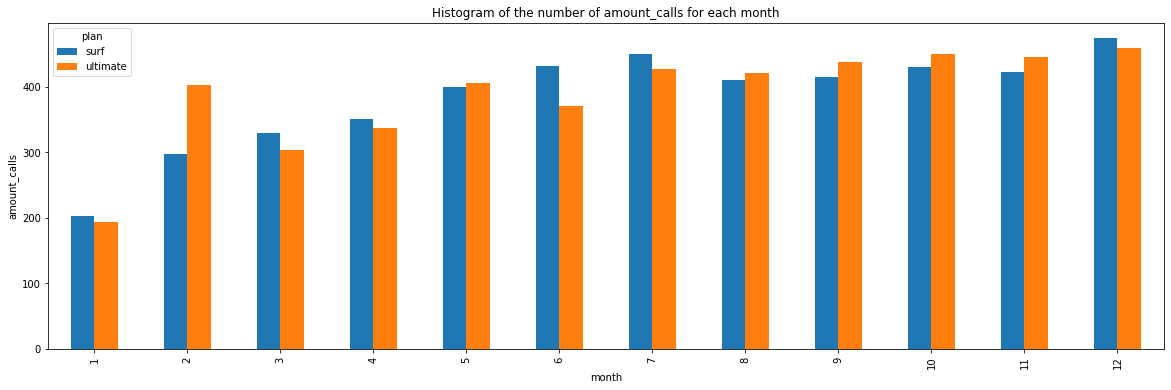

In [85]:
total2.pivot_table(index='month',columns='plan',values='amount_calls').plot(kind='bar',figsize=(20, 6))
plt.title('Histogram of the number of amount_calls for each month'),
plt.ylabel('amount_calls')
plt.show() 

In [86]:
total2.pivot_table(index='month',columns='plan',values='number_calls')

plan,surf,ultimate
month,,
1,30.000000,28.000000
2,40.666667,58.285714
3,46.434783,46.000000
4,48.880000,47.523810
5,55.701299,57.586207
6,59.474227,52.170213
7,63.157025,58.694915
8,57.561728,60.070423
9,58.108247,61.046512


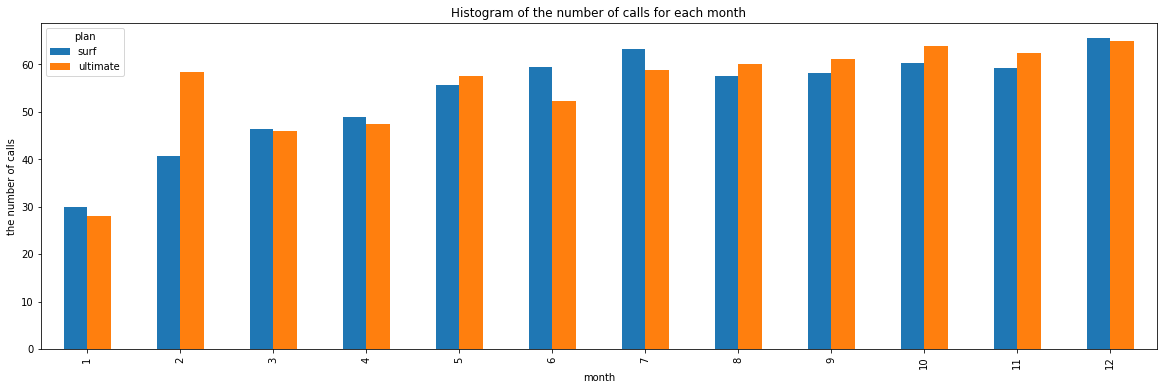

plan        surf   ultimate
count  12.000000  12.000000
mean   53.742263  55.035307
std    10.359064  10.430109
min    30.000000  28.000000
25%    48.268696  51.008612
50%    57.834988  58.490315
75%    59.693223  61.375435
max    65.452830  64.900662
plan
surf        98.367682
ultimate    99.721585
dtype: float64


In [87]:
total2.pivot_table(index='month',columns='plan',values='number_calls').plot(kind='bar',figsize=(20, 6))
plt.title('Histogram of the number of calls for each month'),
plt.ylabel('the number of calls')
plt.show() 
print(total2.pivot_table(index='month',columns='plan',values='number_calls').describe())
print(np.var(total2.pivot_table(index='month',columns='plan',values='number_calls')))


In [88]:
total_amount_calls=total2.pivot_table(index='month',columns='plan',values='amount_calls')# Calculate the mean and the variance of the monthly call duration

count     12.000000
mean     384.469691
std       76.535567
min      203.000000
25%      346.155000
50%      412.168958
75%      430.122211
max      473.836478
Name: surf, dtype: float64
line of outliers:  556.073026556179


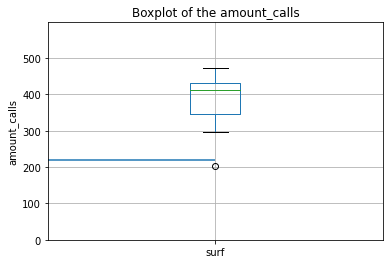

In [89]:
func(total_amount_calls,'surf')
plt.title('Boxplot of the amount_calls'),
plt.ylabel('amount_calls')
plt.show() 

count     12.000000
mean     387.999742
std       77.266064
min      193.500000
25%      362.432371
50%      413.839000
75%      439.432934
max      459.099338
Name: ultimate, dtype: float64
line of outliers:  554.9337775906414


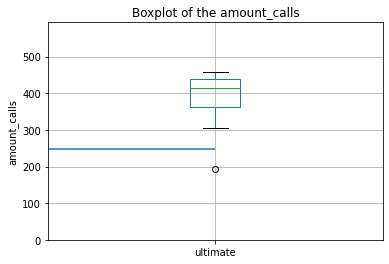

In [90]:
# Plot a boxplot to visualize the distribution of the monthly call duration
func(total_amount_calls,'ultimate')
plt.title('Boxplot of the amount_calls'),
plt.ylabel('amount_calls')
plt.show() 

In [91]:
print(np.var(total_amount_calls['surf']))
np.var(total_amount_calls['ultimate'])

5369.551951906404


5472.540903753354

Both the graphs and the average values  show that the number of calls and their duration according to the ultimate plan are slightly higher than according to the surf plan, but this difference is insignificant, and in general it can be concluded that the distributions are quite similar. Significant difference is observed only in February. You can also see an increase in values for each next month in both plans, except February in Ultimate plan .
The variance Ultimate bit more than Surf. This means that the range of values for Ultimate users is wider than for Surf.

### Messages

In [92]:
df_messages_number_messages=total2.pivot_table(index='month',columns='plan',values='number_messages')
df_messages_number_messages

plan,surf,ultimate
month,,
1,10.500000,15.500000
2,12.000000,21.571429
3,15.260870,20.250000
4,17.400000,22.047619
5,24.012987,32.103448
6,25.298969,29.340426
7,27.033058,32.830508
8,28.777778,38.478873
9,30.762887,37.895349


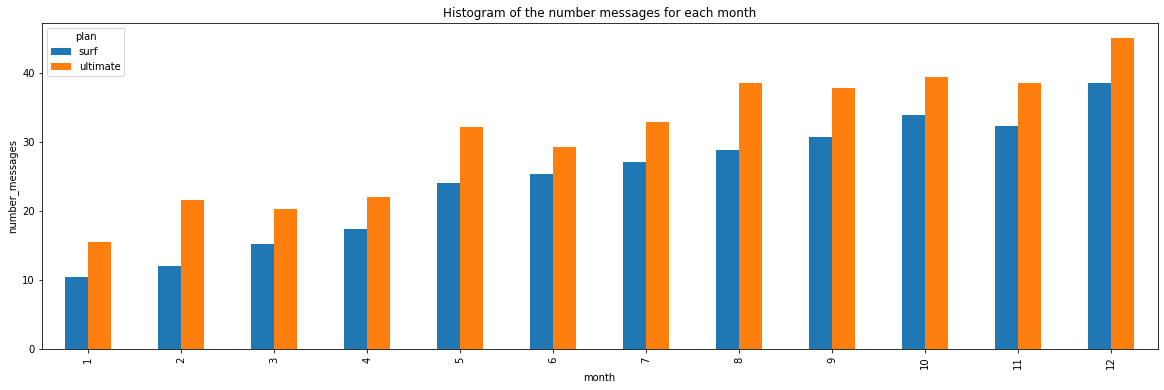

In [93]:
# Compare the number of messages users of each plan tend to send each month
df_messages_number_messages.plot(kind='bar',figsize=(20, 6))
plt.title('Histogram of the number messages for each month'),
plt.ylabel('number_messages')
plt.show() 

count    12.000000
mean     24.656000
std       9.049246
min      10.500000
25%      16.865217
50%      26.166013
75%      31.168455
max      38.600629
Name: surf, dtype: float64
line of outliers:  52.62331066580295


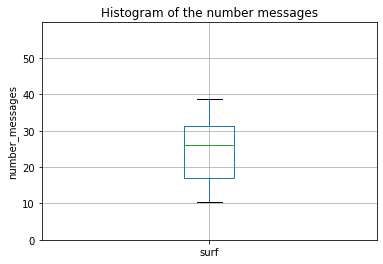

In [94]:
func(df_messages_number_messages,'surf')
plt.title('Histogram of the number messages'),
plt.ylabel('number_messages')
plt.show() 

count    12.000000
mean     31.089497
std       9.346334
min      15.500000
25%      21.928571
50%      32.466978
75%      38.510730
max      45.006623
Name: ultimate, dtype: float64
line of outliers:  63.38396718896053


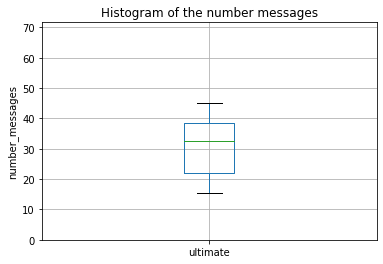

In [95]:
func(df_messages_number_messages,'ultimate')
plt.title('Histogram of the number messages'),
plt.ylabel('number_messages')
plt.show() 

In [96]:
print(np.var(df_messages_number_messages['surf']))#Find the variance of the number of messages for both plans
np.var(df_messages_number_messages['ultimate'])

75.06477581565973


80.07446628813626

According to the number of messages, there is already a noticeable difference. Ultimate plan users send slightly more messages than Surf plan users. 
You can also see a smooth increase in the number of messages for each following month in both plans.
The variance Ultimate more than Surf. This means that the range of values for Ultimate users is wider than for Surf.

### Internet

In [97]:
df_internet_total=(pd.merge(left = df_internet, right = df_users_total, how='outer',on=['user_id']).fillna(0))
df_internet_total


,user_id,month,mb_used,city,plan,group_age,month_term,region,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12.0,1901.47,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,40-49,1,GA MSA,1000,30720,3000,70,7,0.01,0.01
1,1001,8.0,6919.15,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,50,15360,500,20,10,0.03,0.03
2,1001,9.0,13314.82,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,50,15360,500,20,10,0.03,0.03
3,1001,10.0,22330.49,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,50,15360,500,20,10,0.03,0.03
4,1001,11.0,18504.30,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2283,1307,0.0,0.00,"Boston-Cambridge-Newton, MA-NH MSA",surf,18-29,1,MA NH MSA,50,15360,500,20,10,0.03,0.03
2284,1319,0.0,0.00,"Colorado Springs, CO MSA",surf,18-29,6,CO MSA,50,15360,500,20,10,0.03,0.03
2285,1378,0.0,0.00,"Denver-Aurora-Lakewood, CO MSA",surf,18-29,1,CO MSA,50,15360,500,20,10,0.03,0.03
2286,1470,0.0,0.00,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",surf,40-49,8,DC VA MD WV MSA,50,15360,500,20,10,0.03,0.03


In [98]:
df_internet_mb_used=total2.pivot_table(index='month',columns='plan',values='mb_used')
df_internet_mb_used

plan,surf,ultimate
month,,
1,4874.860000,6918.092500
2,12178.843333,17128.808571
3,13345.440000,18321.518333
4,11984.203000,16121.654762
5,13936.354935,16624.482414
6,15301.529175,15337.921064
7,16783.600579,16344.744407
8,16795.331358,17814.720141
9,16591.431289,16969.869535


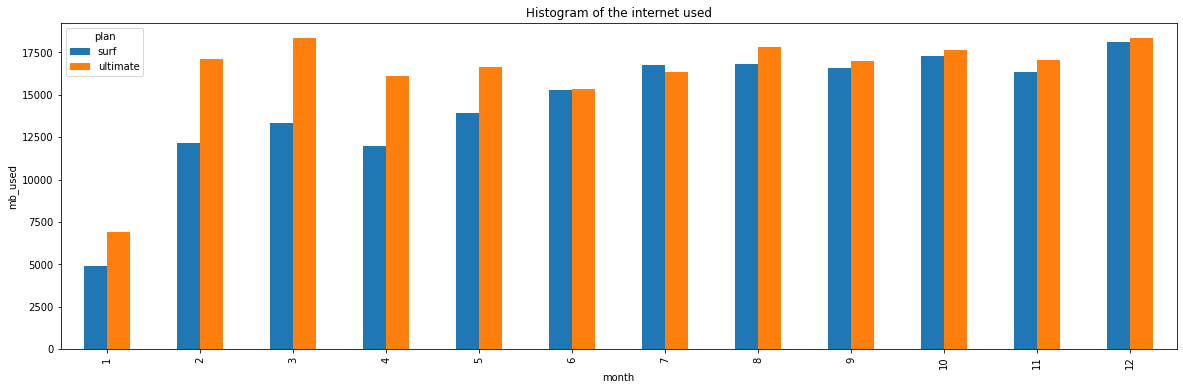

In [99]:
# Compare the amount of internet traffic consumed by users per plan
df_internet_mb_used.plot(kind='bar',figsize=(20, 6))
plt.title('Histogram of the internet used'),
plt.ylabel('mb_used')
plt.show() 

count       12.000000
mean     14464.554377
std       3642.890430
min       4874.860000
25%      13053.790833
50%      15820.391796
75%      16786.533273
max      18132.469371
Name: surf, dtype: float64
line of outliers:  22385.64693347618


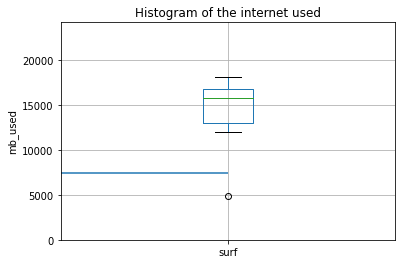

In [100]:
func(df_internet_mb_used,'surf')
plt.title('Histogram of the internet used'),
plt.ylabel('mb_used')
plt.show() 

count       12.000000
mean     16212.603528
std       3057.987791
min       6918.092500
25%      16288.971996
50%      17001.777445
75%      17663.095082
max      18323.191854
Name: ultimate, dtype: float64
line of outliers:  19724.279712611282


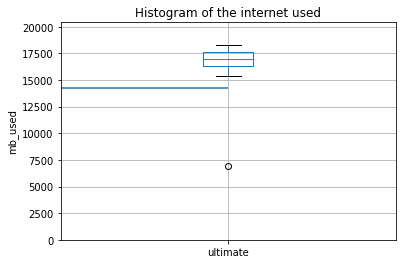

In [101]:
func(df_internet_mb_used,'ultimate')
plt.title('Histogram of the internet used'),
plt.ylabel('mb_used')
plt.show() 

In [102]:
print(np.var(df_internet_mb_used['surf']))#Find the variance of the internet used for both plans
np.var(df_internet_mb_used['ultimate'])

12164763.130145108


8572015.219625542

You can also see a greater consumption of the Internet among users of the Ultimate plan. For these users, consumption is fairly even throughout the year, not counting January, while for Surf users, traffic volume increases over the course of the year.
This also confirms the dispersion index. For Ultimate plan users, it is lower than Cerf. That is, the Internet consumption values of Ultimate are more constant than those of Surf.

## Revenue

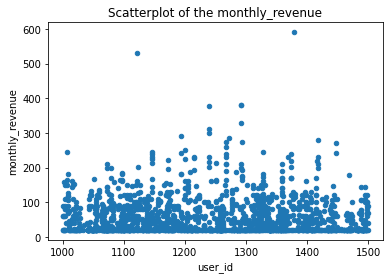

In [103]:
total_surf.plot(x='user_id', y='monthly_revenue', kind='scatter') 
plt.title('Scatterplot of the monthly_revenue'),
plt.show() 

count    1573.000000
mean       60.706408
std        55.388042
min        20.000000
25%        20.000000
50%        40.360000
75%        80.360000
max       590.370000
Name: monthly_revenue, dtype: float64
line of outliers:  170.89999999999998


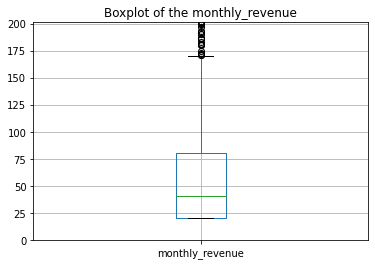

In [104]:
func(total_surf,'monthly_revenue')
plt.title('Boxplot of the monthly_revenue'),
plt.show() 

count    1573.000000
mean       60.706408
std        55.388042
min        20.000000
25%        20.000000
50%        40.360000
75%        80.360000
max       590.370000
Name: monthly_revenue, dtype: float64


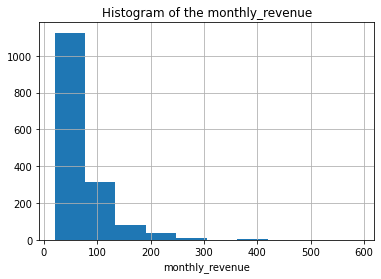

In [105]:
print(total_surf['monthly_revenue'].describe())
total_surf.hist('monthly_revenue')
plt.title('Histogram of the monthly_revenue'),
plt.xlabel('monthly_revenue')
plt.show() 

count    720.000000
mean      72.313889
std       11.395108
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: monthly_revenue, dtype: float64


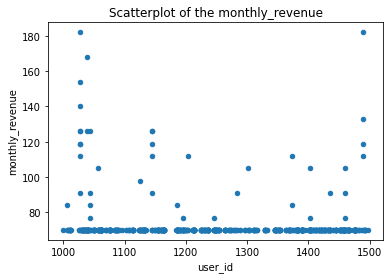

In [106]:
print(total_ultimate['monthly_revenue'].describe())
total_ultimate.plot(x='user_id', y='monthly_revenue', kind='scatter') 
plt.title('Scatterplot of the monthly_revenue'),
plt.show() 

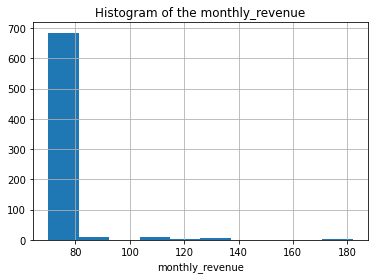

In [107]:
total_ultimate.hist('monthly_revenue')
plt.title('Histogram of the monthly_revenue'),
plt.xlabel('monthly_revenue')
plt.show() 

In [108]:
print(np.var(total_surf['monthly_revenue']))#Find the variance of the monthly_revenue for both plans
np.var(total_ultimate['monthly_revenue'])

3065.8848438690247


129.66814043209877

Almost none of the users on the Ultimate plan exceed the packages included in the plan, so the profit from them does not exceed the subscription fee -70 𝑝𝑒𝑟 𝑚𝑜𝑛𝑡ℎ. 𝑈𝑛𝑙𝑖𝑘𝑒 𝑢𝑠𝑒𝑟 𝑠𝑜 𝑓 𝑡ℎ𝑒 𝑠𝑢𝑟𝑓 plan. 𝐴𝑚𝑜𝑛𝑔 𝑡ℎ𝑒𝑚 𝑡ℎ𝑒𝑟𝑒 𝑖𝑠 𝑎𝑝𝑎𝑟𝑡 𝑜𝑓 𝑢𝑠𝑒𝑟𝑠 𝑤ℎ𝑜 𝑚𝑜𝑛𝑡ℎ𝑙𝑦 𝑝𝑎𝑦 𝑒𝑥𝑡𝑟𝑎 𝑓𝑜𝑟 𝑒𝑥𝑐𝑒𝑠𝑠 𝑝𝑎𝑐𝑘𝑎𝑔𝑒𝑠. 𝑇ℎ𝑒 𝑑𝑖𝑠𝑡𝑟𝑖𝑏𝑢𝑡𝑖𝑜𝑛 𝑜𝑓 𝑖𝑛𝑐𝑜𝑚𝑒 𝑓𝑟𝑜𝑚 𝑡ℎ𝑒𝑚 𝑖𝑠 𝑟𝑖𝑔ℎ𝑡 −ℎ𝑎𝑛𝑑𝑒𝑑. 𝑎𝑣𝑒𝑟𝑎𝑔𝑒 𝑖𝑛𝑐𝑜𝑚𝑒 𝑜𝑓 39 per month.

Monthly income variances for plan users are very different. Surf users have a much larger variance than Ultimate plan users, which means that monthly income values for Ultimate plan users are much more constant than those for Surf.

## Test statistical hypotheses

Samples of the same size are required to test the hypothesis. Since the number of users in the tariff plans is very different, we will consider the average income per month.

In [109]:
total_surf

,user_id,month,amount_calls,number_calls,number_messages,mb_used,city,plan,group_age,month_term,region,monthly_revenue
1,1001,8,182.0,27.0,30.0,6919.15,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,20.00
2,1001,9,315.0,49.0,44.0,13314.82,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,20.00
3,1001,10,393.0,65.0,53.0,22330.49,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,90.09
4,1001,11,426.0,64.0,36.0,18504.30,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,60.00
5,1001,12,412.0,56.0,44.0,19369.18,"Seattle-Tacoma-Bellevue, WA MSA",surf,18-29,4,WA MSA,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2282,1194,12,0.0,0.0,56.0,31088.49,"San Jose-Sunnyvale-Santa Clara, CA MSA",surf,40-49,7,CA MSA,180.18
2286,1349,10,0.0,0.0,76.0,13093.55,"Boston-Cambridge-Newton, MA-NH MSA",surf,60+,2,MA NH MSA,20.78
2287,1349,11,0.0,0.0,72.0,17128.26,"Boston-Cambridge-Newton, MA-NH MSA",surf,60+,2,MA NH MSA,40.66
2288,1349,12,0.0,0.0,61.0,13039.91,"Boston-Cambridge-Newton, MA-NH MSA",surf,60+,2,MA NH MSA,20.33


The null hypothesis-the average revenue from users of the Ultimate and Surf calling plans equal.
The alternative hypothesis-the average revenue from users of the Ultimate and Surf calling plans not equal.

In [110]:
print(np.var(total_surf['monthly_revenue']))#checking selections to select a method
np.var(total_ultimate['monthly_revenue'])

3065.8848438690247


129.66814043209877

In [111]:
# Test the hypotheses
alpha = 0.05# your code: set a critical statistical significance level

results = st.ttest_ind(total_ultimate['monthly_revenue'],total_surf['monthly_revenue'],equal_var = False)# your code: test the hypothesis that the means of the two independent populations are equal

print('p-value:',results.pvalue) # your code: print the p-value you get)

if results.pvalue<alpha: # your code: compare the p-values you get with the statistical significance level):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")   
    

p-value: 3.17039054811355e-15
We reject the null hypothesis


Our null hypothesis was not confirmed, we can conclude that the alternative hypothesis is true and the average revenue from users of the Ultimate and Surf calling plans not equal

In [112]:
total2['region'].unique()

array([' GA MSA', ' WA MSA', ' NV MSA', ' OK MSA', ' TX MSA', ' CA MSA',
       ' MI MSA', ' FL MSA', ' OH MSA', ' IL IN WI MSA', ' TN MSA',
       ' NY NJ PA MSA', ' PA MSA', ' DC VA MD WV MSA', ' IN MSA',
       ' NE IA MSA', ' PA NJ DE MD MSA', ' AL MSA', ' NC SC MSA',
       ' CO MSA', ' NM MSA', ' MA NH MSA', ' AZ MSA', ' OR WA MSA',
       ' OH KY IN MSA', ' SC MSA', ' NY MSA', ' TN MS AR MSA',
       ' KY IN MSA', ' RI MA MSA', ' HI MSA', ' CT MSA', ' LA MSA',
       ' VA NC MSA', ' MD MSA', ' WI MSA', ' VA MSA', ' MO IL MSA',
       ' MN WI MSA', ' MO KS MSA', ' NC MSA', ' UT MSA'], dtype=object)

In [113]:
total2_NY_NJ=total2.query('region==" NY NJ PA MSA"')

In [114]:
total2_others=total2.query('region!=" NY NJ PA MSA"')

The null hypothesis-the average revenue from users in the NY-NJ area and from that of the users from the other regions equal.
The alternative hypotheses-the average revenue from users in the NY-NJ area and from that of the users from the other regions not equal.

In [115]:
print(np.var(total2_NY_NJ['monthly_revenue']))#checking selections to select a method
np.var(total2_others['monthly_revenue'])

1890.5177172681156


2223.8866958162175

In [116]:
# Test the hypotheses
alpha = 0.04# your code: set a critical statistical significance level

results = st.ttest_ind(total2_NY_NJ['monthly_revenue'],total2_others['monthly_revenue'],equal_var = True)# your code: test the hypothesis that the means of the two independent populations are equal

print('p-value:',results.pvalue) # your code: print the p-value you get)

if results.pvalue<alpha: # your code: compare the p-values you get with the statistical significance level):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
    

p-value: 0.043557431621342436
We can't reject the null hypothesis


We can't reject the null hypothesis, so we can the average revenue from users in the NY-NJ area and from that of the users from the other regions equal.

## General conclusion

After analyzing all the data we have on tariffs and users, we can conclude that the Ultimate plan is more profitable for the operator. Since the subscription fee is higher than in the Surf plan, and Surf plan users very rarely overspend the service packages included in their plan. It also confirms the hypotheses. Because we rejected the hypothesis of equality of distributions. From this we can conclude that the difference in the average values is not accidental, and the  of  incomes by the Ultimate plans is larger than by Surf. Regarding the place of residence of users, we can conclude: distributions of income from users from different regions are equal. Our null hypothesis confirmed this because we could not reject it.
After analyzing all the data we have on tariffs and users, we can conclude that the Ultimate plan is more profitable for the operator. Since the subscription fee is higher than in the Surf plan, and Surf plan users very rarely overspend the service packages included in their plan. It also confirms the hypotheses. Because we rejected the hypothesis of equality of distributions. From this we can conclude that the difference in the average values is not accidental, and the  of  incomes by the Ultimate plans is larger than by Surf. Regarding the place of residence of users, we can conclude: distributions of income from users from different regions are equal. Our null hypothesis confirmed this because we could not reject it.